# Decision Trees: Nausea Prediction In-Class Assignment

**Hanaan Shafi**

Data & Decisions: November 13, 2024

Data: https://docs.google.com/spreadsheets/d/1tL1mGNkS039qvfpQeSzXipLruRtcUeo-qfCm5mjTMWc/edit

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Reading and checking out the data

In [2]:
df = pd.read_csv('nausea_data.csv')

In [3]:
df.head()

,Patient_Code,Gender,Age,Weight,Height,BMI,BSA,Marital_Status,Religion,County_of_Residence,...,Day_3_Vomiting,Number_of_Day_3_Vomiting_Episodes,Day_4_Nausea,Scale_of_Day_4_Nausea,Day_4_Vomiting,Number_of_Day_4_Vomiting_Episodes,Day_5_Nausea,Scale_of_Day_5_Nausea,Day_5_Vomiting,Number_of_Day_5_Vomiting_Episodes
0,200,1,45,52.0,1.62,19.814053,1.530,1,0,Nairobi,...,1,0,0,3,1,0,0,1,1,0
1,300,1,32,55.5,1.62,21.147691,1.680,0,0,Nairobi,...,1,0,1,0,1,0,0,7,0,1
2,500,1,46,88.0,1.61,33.949308,1.917,3,0,Kiambu,...,1,0,1,0,1,0,1,0,1,0
3,600,1,41,54.0,1.55,22.476587,1.606,1,0,Nairobi,...,1,0,1,0,1,0,1,0,1,0
4,800,1,37,45.0,1.50,20.000000,1.369,1,0,Kiambu,...,1,0,1,0,1,0,1,0,1,0


In [4]:
df.columns

Index(['Patient_Code', 'Gender', 'Age', 'Weight', 'Height', 'BMI', 'BSA',
       'Marital_Status', 'Religion', 'County_of_Residence', 'Smoking_Status',
       'Drinking_Status', 'Last_Meal_Before_Chemotherapy',
       'Stage_of_Breast_Cancer', 'Duration_of_Illness', 'Children',
       'Morning_Sickness_During_Pregnancy', 'Comorbidities', 'Cycle',
       'Chemotherapy_Regimen', 'Chemotherapy_Frequency', 'Ondansetron',
       'Dexamethasone', 'Granisetron', 'Oral_Dexamethasone',
       'Metoclopramide_10mg_TDS_PO', 'Metoclopramide_10mg_IV', 'Palonosetron',
       'Other_Antiemetics', 'CINV_Route', 'CINV_Frequency',
       'CINV_Time_of_Administration', 'Anticipatory_Vomiting',
       'Nausea_within_24_hours_post_Chemotherapy',
       'Scale_of_Nausea_0_to_24_hours_post_Chemotherapy',
       'Vomiting_0to12_hours_post_Chemotherapy',
       'Number_of_Vomiting_Episodes_0to12_hours_post_Chemotherapy',
       'Vomiting_13to24_hours_post_Chemotherapy',
       'Number_of_Vomiting_Episodes_13to

In [5]:
df['Nausea_within_24_hours_post_Chemotherapy']

,Nausea_within_24_hours_post_Chemotherapy
0,0
1,0
2,0
3,0
4,0
...,...
105,1
106,1
107,0
108,0


In [6]:
df.columns[df.isna().any()].tolist()

[]

## Trial 1: A basic decision tree model

In [7]:
features = df[['Age','Weight', 'Height', 'BMI', 'BSA', 'Cycle', 'Chemotherapy_Regimen', 'Smoking_Status', 'Drinking_Status',
                    'Stage_of_Breast_Cancer', 'Duration_of_Illness', 'Children', 'Morning_Sickness_During_Pregnancy', 'Comorbidities',
                    'Chemotherapy_Regimen', 'Chemotherapy_Frequency', 'Ondansetron', 'Dexamethasone', 'Granisetron', 'Oral_Dexamethasone',
                    'Metoclopramide_10mg_TDS_PO', 'Metoclopramide_10mg_IV', 'Palonosetron', 'Other_Antiemetics', 'CINV_Route', 'CINV_Frequency',
                    'CINV_Time_of_Administration']]
target = df['Nausea_within_24_hours_post_Chemotherapy']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [9]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.82


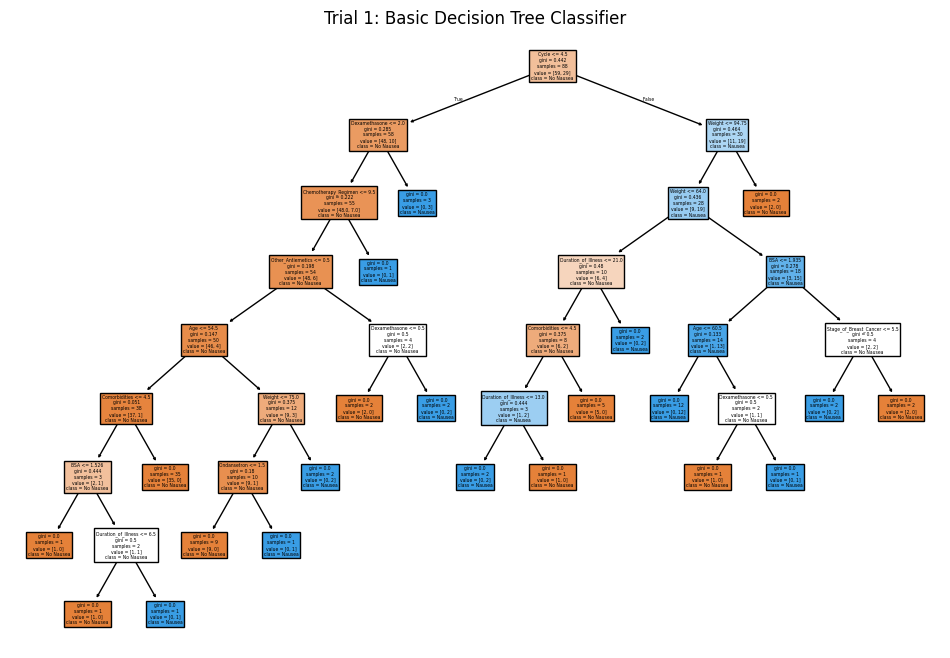

In [11]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=features.columns, class_names=['No Nausea', 'Nausea'], filled=True)
plt.title('Trial 1: Basic Decision Tree Classifier')
plt.show()

## Trial 2: Decision tree with some hyperparameter finetuning (gridsearch CV)

* max_depth: max depth of the tree (chosen to prevent overfittin)
* min_samples_split: min no. of samples required to split an internal node
* min_samples_leaf: min. no. of samples required to be at a leaf node
* criterion: function to measure split quality (gini or entropy)



Using grid search cross-validation this time to determine which combo of hyperparameters work best:

In [12]:
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [13]:
dt = DecisionTreeClassifier(random_state=42)

In [14]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [15]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [16]:
best_model = grid_search.best_estimator_

In [17]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")


Test Set Accuracy: 0.68


## Trial 3: Trying out decision trees with different sets of features + gridsearch CV

In [18]:
feature_sets = [
    ['Age', 'Gender', 'Weight', 'Height', 'BMI', 'BSA', 'Marital_Status', 'Children'], # some basic info
    ['Smoking_Status', 'Drinking_Status', 'Morning_Sickness_During_Pregnancy', 'Comorbidities', 'Stage_of_Breast_Cancer', 'Duration_of_Illness'], # medical history / lifestyle
    ['Cycle', 'Chemotherapy_Regimen', 'Chemotherapy_Frequency', 'Last_Meal_Before_Chemotherapy'], # treatment related
    ['Ondansetron', 'Dexamethasone', 'Granisetron', 'Oral_Dexamethasone', 'Metoclopramide_10mg_TDS_PO', 'Metoclopramide_10mg_IV', 'Palonosetron', 'Other_Antiemetics'], # medication
    ['CINV_Route', 'CINV_Frequency', 'CINV_Time_of_Administration'], # CINV
    ['Ondansetron', 'Dexamethasone', 'Granisetron', 'Oral_Dexamethasone', 'Metoclopramide_10mg_TDS_PO', 'Metoclopramide_10mg_IV',
     'Palonosetron', 'Other_Antiemetics','CINV_Route', 'CINV_Frequency', 'CINV_Time_of_Administration'] #combining medication and CINV
]

In [19]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [20]:
best_models = []
accuracies = []

In [21]:
for features in feature_sets:
    X = df[features]
    y = df['Nausea_within_24_hours_post_Chemotherapy']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
dt = DecisionTreeClassifier(random_state=42)

In [23]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [24]:
best_model = grid_search.best_estimator_
best_models.append(best_model)
accuracy = best_model.score(X_test, y_test)
accuracies.append(accuracy)

In [25]:
print(f"Best Parameters for {features}: {grid_search.best_params_}")
print(f"Test Set Accuracy: {accuracy:.2f}\n")

Best Parameters for ['Ondansetron', 'Dexamethasone', 'Granisetron', 'Oral_Dexamethasone', 'Metoclopramide_10mg_TDS_PO', 'Metoclopramide_10mg_IV', 'Palonosetron', 'Other_Antiemetics', 'CINV_Route', 'CINV_Frequency', 'CINV_Time_of_Administration']: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Set Accuracy: 0.95

